## This notebook will be used to analyze the results of the baseline classifiers and generate graphics for the report/presentation.

In [598]:
## INPUTS

# Where to save the plots:
output_folder = "/Users/agreic/Desktop/Project/"

In [599]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re

# Define a function to extract metrics from the text
def extract_metrics(text):
    metrics = {}

    # More flexible regex patterns to account for variations
    accuracy_pattern = r"Accuracy\s*:\s*([\d.]+)"
    precision_pattern = r"Precision\s*:\s*([\d.]+)"
    recall_pattern = r"Recall\s*:\s*([\d.]+)"
    f1_pattern = r"F1\s*:\s*([\d.]+)"
    roc_auc_pattern = r"ROC\s*AUC\s*:\s*([\d.]+)"
    pr_auc_pattern = r"PR\s*AUC\s*:\s*([\d.]+)"
    confusion_matrix_pattern = r"Confusion\s*Matrix\s*:\s*TP:\s*(\d+),\s*FP:\s*(\d+),\s*TN:\s*(\d+),\s*FN:\s*(\d+)"

    # Combine multiple lines by removing newlines before applying regex
    text = re.sub(r'\n', ' ', text)

    # Extract metrics with flexible space handling
    metrics['Accuracy'] = re.search(accuracy_pattern, text).group(1) if re.search(accuracy_pattern, text) else None
    metrics['Precision'] = re.search(precision_pattern, text).group(1) if re.search(precision_pattern, text) else None
    metrics['Recall'] = re.search(recall_pattern, text).group(1) if re.search(recall_pattern, text) else None
    metrics['F1'] = re.search(f1_pattern, text).group(1) if re.search(f1_pattern, text) else None
    metrics['ROC AUC'] = re.search(roc_auc_pattern, text).group(1) if re.search(roc_auc_pattern, text) else None
    metrics['PR AUC'] = re.search(pr_auc_pattern, text).group(1) if re.search(pr_auc_pattern, text) else None

    confusion_matrix_match = re.search(confusion_matrix_pattern, text)
    if confusion_matrix_match:
        metrics['TP'] = confusion_matrix_match.group(1)
        metrics['FP'] = confusion_matrix_match.group(2)
        metrics['TN'] = confusion_matrix_match.group(3)
        metrics['FN'] = confusion_matrix_match.group(4)

    return metrics

# Define a function to parse the metrics from the content directly
def parse_metrics_content(content):
    # Initialize a dictionary to store metrics for each section
    all_metrics = {}

    # Split the content manually by sections
    sections = ['Train', 'Validation', 'Test']
    section_splits = {}

    # Find where each section starts
    for section in sections:
        pattern = re.compile(f"{section}", re.DOTALL)
        match = pattern.search(content)
        if match:
            start = match.start()
            section_splits[section] = start

    # Sort sections by their position in the text
    sorted_sections = sorted(section_splits.items(), key=lambda x: x[1])

    # Loop through sorted sections and extract text for each section
    for i, (section, start_pos) in enumerate(sorted_sections):
        # Determine the end position of the section
        end_pos = sorted_sections[i + 1][1] if i + 1 < len(sorted_sections) else len(content)

        # Extract section text
        section_text = content[start_pos:end_pos]

        # Extract metrics for this section
        metrics = extract_metrics(section_text)
        all_metrics[section] = metrics

    # Convert metrics to a pandas DataFrame for better visualization
    return pd.DataFrame(all_metrics)

logreg_dict = {}
rf_dict = {}
root_dir = "/Users/agreic/Desktop/testing_dir/fit_output/"
# Inside the root_dir, we have directories with the names of the different markers:
for marker in os.listdir(root_dir):
    # IGNORE HIDDEN FILES
    if marker[0] == ".":
        continue
    # Inside each marker directory, we have two subdirectories: "logreg" and "rf".
    for model in os.listdir(root_dir + marker):
        # IGNORE HIDDEN FILES
        if model[0] == ".":
            continue
        # Inside the logreg dir, we have subdirectories named "2d" and "3d".
        # inside of those, there are "metrics" files.
        if model == "logreg":
            for dim in os.listdir(root_dir + marker + "/logreg"):
                if dim[0] == ".":
                    continue
                for file in os.listdir(root_dir + marker + "/logreg/" + dim):
                    if "metrics" in file:
                        # Read the text file.
                        data = (root_dir + marker + "/logreg/" + dim + "/" + file)
                        # Read the whole text file into a variable text:
                        with open(data, "r") as f:
                            text = f.read()    
                        data_frame = parse_metrics_content(text)
                        # Add to a dictionary with the key created as a combination of marker and file name.
                        logreg_dict[marker + "_" + file] = data_frame
        # Inside the rf dir, we have csv files with the metrics for 2d, 3d and val and test data.
        if model == "rf":
            for file in os.listdir(root_dir + marker + "/rf"):
                if "results" in file:
                    # Read the csv file.
                    data = (root_dir + marker + "/rf/" + file)
                    data_frame = pd.read_csv(data)
                    # Add to a dictionary with the key created as a combination of marker and file name.
                    rf_dict[marker + "_" + file] = data_frame

table_for_metrics = rf_dict.copy()
table_for_logreg_metrics = logreg_dict.copy()

print(logreg_dict)

{'PU1_metrics_3d.txt':                         Train           Validation                 Test
Accuracy   0.7697870630775412  0.41391614629794826   0.5618892508143323
Precision  0.5669882100750268  0.09410112359550561  0.26080246913580246
Recall     0.7578796561604585   0.8481012658227848   0.7412280701754386
F1         0.6486817903126916  0.16940581542351454   0.3858447488584475
ROC AUC    0.8511588506045029   0.6712019242450012   0.6986096491228071
PR AUC     0.6724321026943784  0.11312315135476186  0.31005948955164764
TP                        529                   67                  169
FP                        404                  645                  479
TN                       1387                  397                  521
FN                        169                   12                   59, 'PU1_metrics_2d.txt':                         Train           Validation                 Test
Accuracy   0.7468862997187625   0.6494201605709188   0.6661237785016286
Precision  0.53448

In [600]:
logreg_dict["SCA1_metrics_2d.txt"]

,Train,Validation,Test
Accuracy,0.8055443953394937,0.4446428571428571,0.32084690553745926
Precision,0.19569120287253142,0.13191489361702127,0.1524122807017544
Recall,0.7517241379310344,0.9029126213592233,0.695
F1,0.31054131054131057,0.2301980198019802,0.25
ROC AUC,0.8770360127103684,0.7233152905461524,0.4672519455252918
PR AUC,0.39486564702816024,0.19032367834837663,0.16240936680656232
TP,109,93,139
FP,448,612,773
TN,1896,405,255
FN,36,10,61


In [601]:
logreg_dict["SCA1_metrics_3d.txt"]

,Train,Validation,Test
Accuracy,0.8179991964644435,0.6580357142857143,0.5301302931596091
Precision,0.21794871794871795,0.09770114942528736,0.20684292379471228
Recall,0.8206896551724138,0.3300970873786408,0.665
F1,0.34442836468885674,0.15077605321507762,0.3155397390272835
ROC AUC,0.905599034953513,0.5785911351681607,0.6164494163424125
PR AUC,0.4874252258538435,0.10433924546695972,0.2506347303223558
TP,119,34,133
FP,427,314,510
TN,1917,703,518
FN,26,69,67


In [602]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_logreg_plot_df(logreg_dict):
    markers = []
    for key in logreg_dict.keys():
        markers.append(key.split("_")[0])
    markers = list(set(markers))

    # Initialize an empty list to hold data for plotting
    plot_data = []

    # We will only use the Test data.
    for filename, data in logreg_dict.items():
        marker = filename.split("_")[0]
        dim = filename.split("_")[2].replace(".txt", "")

        # Extract the Test data
        test_data = data["Validation"]

        # Append each metric to the plot_data list as a dictionary
        for metric in ['Accuracy', 'Precision', 'Recall', 'F1']:
            if metric in test_data:
                plot_data.append({
                    'Marker': marker,
                    'Dimension': dim,
                    'Metric': metric,
                    'Value': float(test_data[metric]) if test_data[metric] is not None else None
                })

    # Convert list of dictionaries to a DataFrame for Seaborn
    plot_df = pd.DataFrame(plot_data)
    return plot_df



# Example call with logreg_dict data (assuming logreg_dict is structured correctly)
df = get_logreg_plot_df(logreg_dict)
# print(df)
metric_value = {'Accuracy': 1, 'Precision': 5.0, 'Recall': 7.0, 'F1': 3.0}
dim_value = {'2d' : 0, '3d' : 1}
df['x_positional_encoding'] = df['Dimension'].map(dim_value) + df['Metric'].map(metric_value)


In [603]:
print(df)

   Marker Dimension     Metric  Value  x_positional_encoding
0     PU1        3d   Accuracy  0.414                  2.000
1     PU1        3d  Precision  0.094                  6.000
2     PU1        3d     Recall  0.848                  8.000
3     PU1        3d         F1  0.169                  4.000
4     PU1        2d   Accuracy  0.649                  1.000
5     PU1        2d  Precision  0.137                  5.000
6     PU1        2d     Recall  0.747                  7.000
7     PU1        2d         F1  0.231                  3.000
8    SCA1        3d   Accuracy  0.658                  2.000
9    SCA1        3d  Precision  0.098                  6.000
10   SCA1        3d     Recall  0.330                  8.000
11   SCA1        3d         F1  0.151                  4.000
12   SCA1        2d   Accuracy  0.445                  1.000
13   SCA1        2d  Precision  0.132                  5.000
14   SCA1        2d     Recall  0.903                  7.000
15   SCA1        2d     

In [604]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Set the style for the plots
# sns.set(style="ticks")  # Change to "ticks" for cleaner edges

# # Create the bar plot
# plt.figure(figsize=(12, 6))
# palette = sns.color_palette("Set2", n_colors=len(df['Marker'].unique()))

# # Use `hue` for differentiation and `dodge` to separate bars
# sns.barplot(
#     data=df,
#     x='Metric',
#     y='Value',
#     hue='Marker',
#     palette=palette,
#     dodge=True,
#     alpha=.5,  # Set a general alpha
# )

# # Add a second layer for 3D metrics with less transparency
# sns.barplot(
#     data=df[df['Dimension'] == '3d'],
#     x='Metric',
#     y='Value',
#     hue='Marker',
#     palette=palette,
#     dodge=True,
#     alpha=.50,  # Full opacity for 3D bars
# )

# # Customizing the axes
# plt.title("Comparison of 2D vs 3D Metrics for Each Marker", fontsize=16)
# plt.xlabel("")
# plt.ylabel("")

# # Customize ticks: only keep 0 and 1
# plt.xticks(rotation=45)
# plt.yticks([0, 1])  # Set y-ticks to only 0 and 1

# # Remove unnecessary gridlines and top/right spines
# sns.despine()

# # Show the plot
# plt.legend(title="Marker", loc='upper right')
# plt.show()


In [605]:
# # Set up one big plot
# fig, ax = plt.subplots(figsize=(10, 6))

# # Define a color palette for markers
# palette = {
#     'PU1': 'blue',
#     'SCA1': 'orange',
#     'GATA1': 'green',
#     'CD41': 'red'
# }

# for marker in df['Marker'].unique():
#     # if marker != 'CD41':
#     #     continue
#     # Filter the data for the current marker
#     marker_data = df[df['Marker'] == marker]

#     # Set the x and y positions for the points
#     x_pos = marker_data['x_positional_encoding']
#     y_pos = marker_data['Value']

#     # Set the bar color
#     color = palette[marker]

#     # Plot lines. Pos encoding 1 and 2, then 3 and 4, then 5 and 6, etc.
#     sub1 = marker_data[(marker_data['x_positional_encoding'] == 1) | (marker_data['x_positional_encoding'] == 2)]
#     ax.plot(sub1['x_positional_encoding'], sub1['Value'], label=marker, color=color, marker='o', linestyle='-', linewidth=1)

#     sub2 = marker_data[(marker_data['x_positional_encoding'] == 3) | (marker_data['x_positional_encoding'] == 4)]
#     ax.plot(sub2['x_positional_encoding'], sub2['Value'], label=marker, color=color, marker='o', linestyle='-', linewidth=1)

#     sub3 = marker_data[(marker_data['x_positional_encoding'] == 5) | (marker_data['x_positional_encoding'] == 6)]
#     ax.plot(sub3['x_positional_encoding'], sub3['Value'], label=marker, color=color, marker='o', linestyle='-', linewidth=1)

#     sub4 = marker_data[(marker_data['x_positional_encoding'] == 7) | (marker_data['x_positional_encoding'] == 8)]
#     ax.plot(sub4['x_positional_encoding'], sub4['Value'], label=marker, color=color, marker='o', linestyle='-', linewidth=1)


# # Set labels and title
# ax.set_xlabel('Metrics (Positional Encoding)')
# ax.set_ylabel('Value')
# ax.set_title('Metric Comparison between 2D and 3D by Marker')
# ax.legend()
# ax.grid()
# # ax.log_scale = True
# plt.tight_layout()
# plt.show()

# print(df[df['Marker'] == 'CD41'])

## LOGREG PLOT

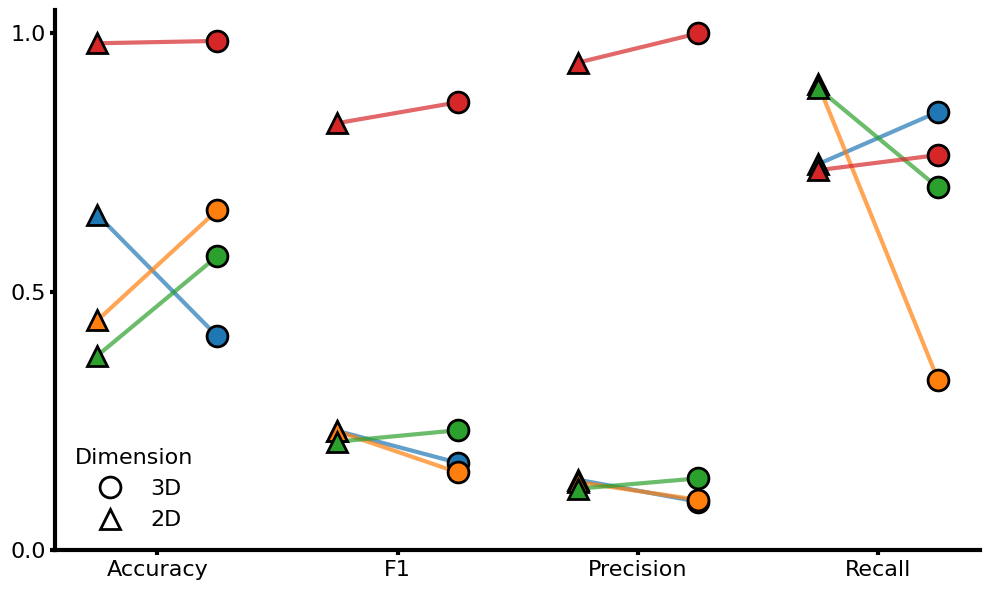

In [606]:
# Set up one big plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define a new color palette for markers (more harmonious colors)
palette = {
    'PU1': '#1f77b4',   # muted blue
    'SCA1': '#ff7f0e',  # muted orange
    'GATA1': '#2ca02c', # muted green
    'CD41': '#d62728'   # muted red
}

# color1 = 'darkblue'
# color2 = 'darkorange'
# color3 = 'darkgreen'
# color4 = 'black'

# color1 = '#00796b'
# color2 = '#3f51b5'
# color3 = '#b8860b'
# color4 = '#455a64'

# color1 =  '#1e3a5f'
# color2 = '#3a506b'
# color3 = '#c49b66'
# color4 = '#006d32'

# palette = {
#     'PU1': color1,   # muted blue
#     'SCA1': color2,  # muted orange
#     'GATA1': color3, # muted green
#     'CD41': color4   # muted red
# }

# palette = {
#     'PU1': '#3CB371',   # Medium Sea Green
#     'SCA1': '#4682B4',  # Steel Blue
#     'GATA1': '#5F9EA0', # Cadet Blue
#     'CD41': '#7B68EE'   # Medium Slate Blue
# }

# palette = {
#     'PU1': '#606c38',
#     'SCA1': '#283618',
#     #fefae0
#     'GATA1': '#dda15e',
#     'CD41': '#bc6c25'
# }

for marker in df['Marker'].unique():
    # Filter the data for the current marker
    marker_data = df[df['Marker'] == marker]

    # Set the bar color
    color = palette[marker]

    # Plot lines. Pos encoding 1 and 2, then 3 and 4, then 5 and 6, etc.
    for i in range(1, 9, 2):
        sub = marker_data[(marker_data['x_positional_encoding'] == i) | (marker_data['x_positional_encoding'] == i + 1)]

        # To create a fake outline, we plot  thicker line in black below
        # ax.plot(sub['x_positional_encoding'], sub['Value'], label=marker if i == 1 else "", color='black', marker='o', linestyle='-', linewidth=6, zorder=1)

        ax.plot(sub['x_positional_encoding'], sub['Value'], label=marker if i == 1 else "", color=color, marker='o', linestyle='-', linewidth=3, zorder=2, alpha = 0.7)


# Plot dots at the end of the lines, a triangle for 2D and a circle for 3D
for marker in df['Marker'].unique():
    # Filter the data for the current marker
    marker_data = df[df['Marker'] == marker]

    for i in range(len(marker_data['x_positional_encoding'])):
        color = palette[marker]
        if marker_data['Dimension'].iloc[i] == '2d':
            marker_shape = '^'
        else:
            marker_shape = 'o'
        
        ax.plot(marker_data['x_positional_encoding'].iloc[i], marker_data['Value'].iloc[i], color=color, marker=marker_shape, markersize=15, zorder=3, markeredgewidth=2, markeredgecolor='black')


# Customize axes
ax.set_xticks([1.5, 3.5, 5.5, 7.5], labels=['Accuracy', 'F1', 'Precision', 'Recall'])
ax.set_yticks([0,0.5, 1])  # Set y-ticks to only show 0 and 1
# Change spine colors
for spine in ax.spines.values():
    spine.set_color('black')

ax.tick_params(axis='both', which='both', width=3)  # Increase tick width
ax.set_xlabel('Accuracy F1 Precision Recall (L: 2D, R: 3D)', fontsize=16)
ax.set_ylabel('', fontsize=12)  # Remove the 'Value' label



# Set y-ticks to specific values
plt.yticks([0, 0.5, 1])  # Set y-ticks to 0, 0.5, and 1

# Remove the grid
plt.grid(False)
ax.grid(False)  # Remove the grid behind the plot

# Thicker axes and ticks
ax = plt.gca()  # Get current axes
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_visible(False)  # Remove top spine
ax.spines['right'].set_visible(False)  # Remove right spine

ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.tick_params(axis='both', width=3)  # Set tick width

plt.legend().set_visible(False) # Remove legend

# Remove x-axis and y-axis label
plt.xlabel('')
plt.ylabel('')

# Set fontsize for x and y ticks
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Set spine colors to black
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

# ax.set_title('Metric Comparison between 2D and 3D by Marker', fontsize=14)
# ax.legend(title='', fontsize=16, title_fontsize='0')
# Show the legend signifying the dimension, use custom handles
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=15, markeredgewidth=2, markeredgecolor='black'),
           plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='white', markersize=15, markeredgewidth=2, markeredgecolor='black')]
labels = ['3D', '2D']
plt.legend(handles, labels, title='Dimension', fontsize=16, title_fontsize=16, loc='lower left', frameon=False)
# ax.plot(marker_data['x_positional_encoding'].iloc[i], marker_data['Value'].iloc[i], color=color, marker=marker_shape, markersize=15, zorder=3, markeredgewidth=2, markeredgecolor='black')


plt.tight_layout()

# Change resolution to 300 dpi
plt.savefig(os.path.join(output_folder, "logreg_2d_3d.png"), dpi=300, bbox_inches='tight')

plt.show()

## RF PLOT

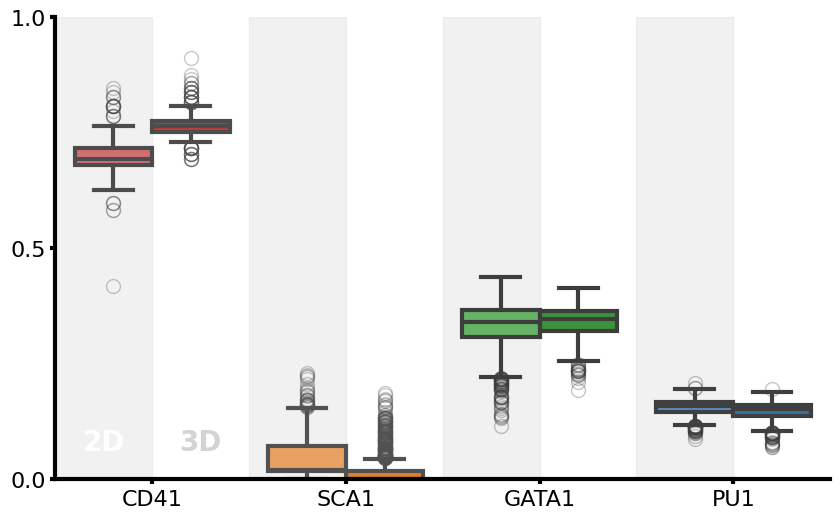

In [607]:
# For rf, we first sort all the csv files by the f1 score.
for key in rf_dict:
    rf_dict[key] = rf_dict[key].sort_values(by="f1_score", ascending=False)

########## PLOTTING ##########
# Now we plot the ALL f1 scores and compare the 2d vs 3d for each marker.

rf_df = pd.DataFrame()
for key in rf_dict:
    # Extract marker from key
    marker = key.split("_")[0]
    # print(marker)
    # Extract the data
    marker_data = rf_dict[key]
    # Extract dimension
    dim = key.split("_")[1].replace("test", "")
    # Extract val/test
    val_test = key.split("_")[2].replace(".csv", "") if "val" in key else "test"

    # create new columns for dimension and marker
    marker_data["Dimension"] = dim
    marker_data["Marker"] = marker
    marker_data["dataset"] = val_test
    # Append to the main dataframe
    rf_df = pd.concat([rf_df, marker_data])

metric_value = {'Accuracy': 1, 'accuracy': 1, 'Precision': 5.0, 'precision': 5.0, 'Recall': 7.0, 'recall': 7.0, 'F1': 2.0, 'f1_score': 2.0}
# dim_value = {'2d' : 0, '3d' : 1, '3D' : 1, '2D' : 0}
# Convert the columns of metrics into a single column, with the value stored in the Value column.
# Eg each row will be made into 4 rows, one for each metric.
melted_rf_df = pd.melt(rf_df,id_vars=(set(rf_df.columns) -  set(['accuracy', 'f1_score', 'precision', 'recall'])),
            value_vars=['accuracy', 'f1_score', 'precision', 'recall'],
            var_name='Metric',
            value_name='Value')

assert len(melted_rf_df) == len(rf_df) * 4

melted_rf_df['x_positional_encoding'] = melted_rf_df['Marker'].map({'CD41': 1, 'SCA1':2, 'GATA1':3, 'PU1':4})
# melted_rf_df['Metric'].map(metric_value) + melted_rf_df['Marker'].map({'CD41': 0, 'SCA1':1, 'GATA1':2, 'PU1':3})
# Drop the rows with test data.
plot_df = melted_rf_df[melted_rf_df["dataset"] == "val"]

# print(plot_df)

assert len(plot_df) == len(rf_df) * 4 / 2

# Throw out clutter we dont need for plotting
# plot_df = plot_df[(plot_df['Metric'] == 'accuracy')] # TODO Change the filtering here to metric of interest.
plot_df = plot_df[(plot_df['Metric'] == 'f1_score')] # TODO Change the filtering here to metric of interest.
plot_df.drop(columns=['dataset'], inplace=True)
# Create ColorKey for the markers and Dimension
plot_df['ColorKey'] = plot_df['Marker'] + "_" + plot_df['Dimension']

palette = {
    "PU1_2D": "#4a8fcf",  # Lighter blue for 2D
    "PU1_3D": "#1f77b4",  # Original muted blue for 3D

    "SCA1_2D": "#ff9f4c", # Lighter orange for 2D
    "SCA1_3D": "#ff7f0e", # Original muted orange for 3D

    "GATA1_2D": "#58c058", # Lighter green for 2D
    "GATA1_3D": "#2ca02c", # Original muted green for 3D

    "CD41_2D": "#e15f5f", # Lighter red for 2D
    "CD41_3D": "#d62728"  # Original muted red for 3D
}

fig, ax = plt.subplots(figsize=(10, 6))

# Add shading behind 2D plots
ax.axvspan(xmin=.5, xmax=1, color='lightgrey', alpha=0.3)  # Adjust x-range for shading as needed
ax.axvspan(xmin=-.5, xmax=0, color='lightgrey', alpha=0.3)  # Adjust x-range for shading as needed
ax.axvspan(xmin=1.5, xmax=2, color='lightgrey', alpha=0.3)  # Adjust x-range for shading as needed
ax.axvspan(xmin=2.5, xmax=3, color='lightgrey', alpha=0.3)  # Adjust x-range for shading as needed
plt.text(-.25, 0.05, '2D', color='white', fontsize=20, weight='bold', ha='center', va='bottom')
plt.text(.25, 0.05, '3D', color='lightgrey', fontsize=20, weight='bold', ha='center', va='bottom')

# print(plot_df['Marker'].unique())   # ['PU1' 'SCA1' 'GATA1' 'CD41']

for key in ['CD41', 'SCA1', 'GATA1', 'PU1']:
    # Filter the data for the current marker
    marker_data = plot_df[plot_df['Marker'] == key]
    # print(marker_data)

    # Set the color
    color = [palette[key + '_2D'], palette[key + '_3D']]

    # Sort marker data by dimension
    marker_data = marker_data.sort_values(by='Dimension')

    # Plot boxplots
    sns.boxplot(
        data=marker_data,
        x='Marker',
        y='Value',
        hue='Dimension',
        palette=color,
        dodge=True,
        ax=ax,
        linewidth=3,
        flierprops=dict(marker='o', markersize=10, alpha=0.3, color='black')
        
        # log_scale=True
    )

# Set y-ticks to specific values
plt.yticks([0, 0.5, 1])  # Set y-ticks to 0, 0.5, and 1
# Set limits for y-axis
plt.ylim(0, 1)

# Remove the grid
plt.grid(False)

# Thicker axes and ticks
ax = plt.gca()  # Get current axes
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.tick_params(axis='both', width=3)  # Set tick width

plt.legend().set_visible(False) # Remove legend

# Remove x-axis and y-axis label
plt.xlabel('')
plt.ylabel('')

# Set fontsize for x and y ticks
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Set spine colors to black
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

# Change resolution to 300 dpi
# plt.savefig(os.path.join(output_folder, "rf_2d_3d_acc.png"), dpi=300, bbox_inches='tight')
# plt.savefig(os.path.join(output_folder, "rf_2d_3d_f1.png"), dpi=300, bbox_inches='tight')

plt.show()

## RF, BEST MODELS FOR EACH MARKER BASED ON VALIDATION SET SCORE ON F1.

/var/folders/33/8fj_gn7d4wj3r70mvvqjp9zh0000gn/T/ipykernel_11968/1838982859.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Unnamed: 0'] = df['Unnamed: 0'] + "_" + df['Dimension']
/var/folders/33/8fj_gn7d4wj3r70mvvqjp9zh0000gn/T/ipykernel_11968/1838982859.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_df['Dimension'] = table_df['Dimension'].str.replace('2d', '2D').str.replace('3d', '3D')
/var/folders/33/8fj_gn7d4wj3r70mvvqjp9zh0000gn/T/ipykernel_11968/1838982859.py:39: FutureWarning: Da

       Dimension Accuracy     F1 Precision Recall Model
Marker                                                 
CD41          3D    0.997  0.962     0.981  0.944    RF
GATA1         2D    0.644  0.347     0.222  0.789    RF
SCA1          2D    0.793  0.142     0.219  0.105    RF
PU1           2D    0.755  0.238     0.281  0.206    RF
/Users/agreic/Desktop/Project/table_rf.png
Table saved to: /Users/agreic/Desktop/Project/table_rf.png


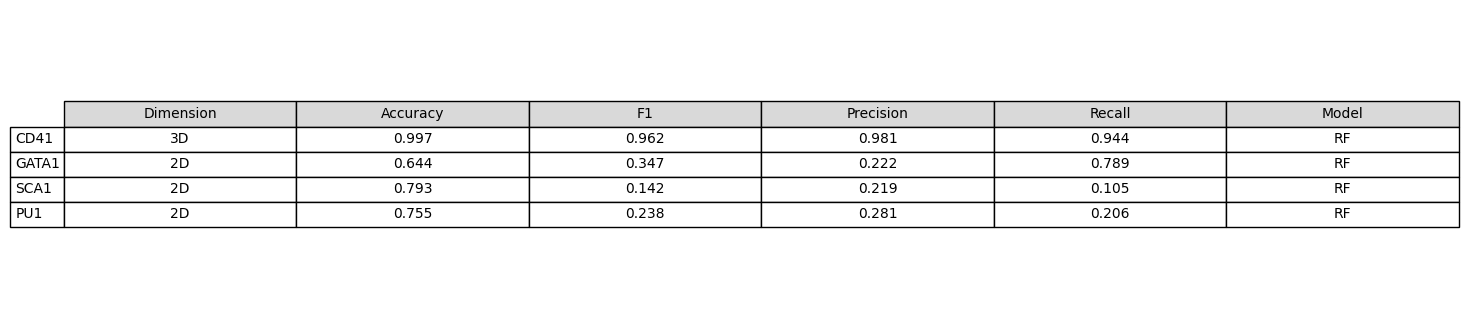

In [608]:
# Find the best model for each marker.
best_models = {}
df = rf_df
df = df[df['dataset'] == 'val']
# Sort by f1.
df = df.sort_values(by=['f1_score'], ascending=False)
# Rename the values in 'Unnamed: 0' to contain the dimension.
df['Unnamed: 0'] = df['Unnamed: 0'] + "_" + df['Dimension']

for marker in df['Marker'].unique():
    best_models[marker] = df[df['Marker'] == marker].iloc[0]['Unnamed: 0']

# print(best_models)

# Retrieve the score for the best models in the test set.
df = rf_df
df = df[df['dataset'] == 'test']
df['Unnamed: 0'] = df['Unnamed: 0'] + "_" + df['Dimension']
best_scores = {}
for marker, model_name in best_models.items():
    best_scores[marker] = df[(df['Marker'] == marker) & (df['Unnamed: 0'] == model_name)]

# print(best_scores)

df = pd.DataFrame()
for best_score in best_scores.values():
    df = pd.concat([df, best_score])
# print(df)

# Remove the index column
df.reset_index(drop=True, inplace=True)

# Set up a dataframe containing the best scores for each marker.
# This table can then be used directly for presenting.
from pandas.plotting import table

def format_numeric_values(df):
    numeric_cols = df.select_dtypes(include='number').columns
    df[numeric_cols] = df[numeric_cols].applymap(lambda x: f"{x:.3f}")
    return df

# Function to create and save table
def create_table(df, columns, filename='table.png', type='RF'):
    # Filter DataFrame to include only the specified columns
    table_df = df[columns]

    # Format the column names to upper
    table_df.columns = table_df.columns.str.capitalize()
    # If f1_score or F1, rename to F1 Score
    table_df.columns = table_df.columns.str.replace('F1_score', 'F1')

    # Replace entries in Dimension column with 3D and 2D if 2d and 3d
    table_df['Dimension'] = table_df['Dimension'].str.replace('2d', '2D').str.replace('3d', '3D')


    table_df = format_numeric_values(table_df)
    # remove the index
    table_df.set_index('Marker', inplace=True)

    # Add type of model to the table
    table_df['Model'] = type

    print(table_df)

    # Create a figure
    fig, ax = plt.subplots(figsize=(10, 4))  # Set size as needed
    ax.axis('tight')
    ax.axis('off')

    # Create the table and color the rows
    tbl = table(ax, table_df, loc='center', cellLoc='center', colWidths=[0.2] * len(columns))

    # Adjust font size and scaling
    tbl.auto_set_font_size(True) 
    # tbl.set_fontsize(16)
    tbl.scale(1.5, 1.5)  # Scale to make the text larger
    tbl.auto_set_column_width(columns)  # Automatically adjust column width

    # Hide row indices
    for key in tbl.get_celld().keys():
        cell = tbl.get_celld()[key]
        if key[0] == 0:  # Header row
            cell.set_facecolor('#d9d9d9')  # Optional: set header background color
        else:
            # cell.set_visible(False)  # Hide row index
            cell.set_edgecolor('black')

    # Save the table
    out_path = os.path.join(output_folder + filename)
    print(out_path)

    plt.savefig(out_path, bbox_inches='tight', dpi=300)

    # Print where saved
    print(f"Table saved to: {out_path}")
    plt.show()
    plt.close()
    return table_df

# Example usage
columns_to_show = ['Marker', 'Dimension', 'accuracy', 'f1_score', 'precision', 'recall']  # Columns to include

rf_table = create_table(df, columns=columns_to_show, filename='table_rf.png')



In [609]:
print(logreg_dict.keys())
print(logreg_dict["SCA1_metrics_3d.txt"]['Test'])
# print(rf_dict.keys())
# print(rf_dict["SCA1_3Dtest_results.csv"].head())

dict_keys(['PU1_metrics_3d.txt', 'PU1_metrics_2d.txt', 'SCA1_metrics_3d.txt', 'SCA1_metrics_2d.txt', 'GATA1_metrics_3d.txt', 'GATA1_metrics_2d.txt', 'CD41_metrics_3d.txt', 'CD41_metrics_2d.txt'])
Accuracy      0.5301302931596091
Precision    0.20684292379471228
Recall                     0.665
F1            0.3155397390272835
ROC AUC       0.6164494163424125
PR AUC        0.2506347303223558
TP                           133
FP                           510
TN                           518
FN                            67
Name: Test, dtype: object


       Dimension Accuracy     F1 Precision Recall   Model
Marker                                                   
CD41          3D    0.997  0.962     1.000  0.926  LogReg
GATA1         3D    0.446  0.278     0.165  0.891  LogReg
PU1           2D    0.666  0.409     0.305  0.623  LogReg
SCA1          2D    0.321  0.250     0.152  0.695  LogReg
/Users/agreic/Desktop/Project/table_logreg.png


/var/folders/33/8fj_gn7d4wj3r70mvvqjp9zh0000gn/T/ipykernel_11968/1838982859.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_df['Dimension'] = table_df['Dimension'].str.replace('2d', '2D').str.replace('3d', '3D')
/var/folders/33/8fj_gn7d4wj3r70mvvqjp9zh0000gn/T/ipykernel_11968/1838982859.py:39: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[numeric_cols] = df[numeric_cols].applymap(lambda x: f"{x:.3f}")
/var/folders/33/8fj_gn7d4wj3r70mvvqjp9zh0000gn/T/ipykernel_11968/1838982859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

Table saved to: /Users/agreic/Desktop/Project/table_logreg.png


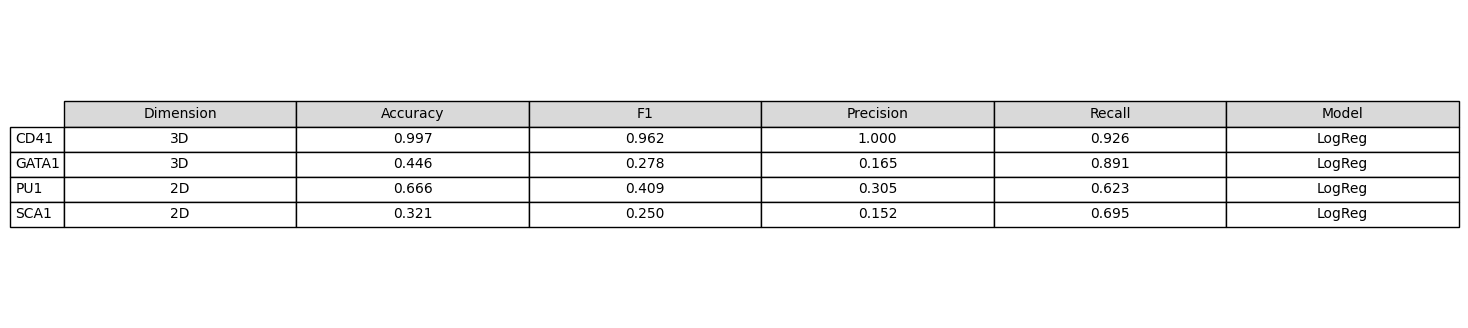

In [610]:
# For RF and Logreg, we want to find the best models    

# We will extract the best F1 score on validation data for each marker, then use that model to get the test data for all metrics.
# We will then create a table with the best model for each marker, and the metrics on the test data.

logreg_df = pd.DataFrame()
# For logreg:
for key, value in table_for_logreg_metrics.items():
    # print(key)
    # print(value)

    # Extract the marker and dimension from the key
    marker = key.split("_")[0]
    dim = key.split("_")[2].replace(".txt", "")
    # print(marker, dim)
    # Extract Validation F1
    f1 = value['Validation']['F1']
    # Append to the dataframe
    logreg_df = pd.concat([logreg_df, pd.DataFrame({'Marker': [marker], 'Dimension': [dim], 'F1': [f1]})])

# print(logreg_df)

# Keep only the dimension which had a higher F1 score.
logreg_df = logreg_df.sort_values(by=['F1'], ascending=False)
logreg_df.drop_duplicates(subset='Marker', keep='first', inplace=True)

# print(logreg_df)

# Now, for each Marker and dimension thats left in logreg_df, we will 
# Access the Test Results, and aggregate them into a table.
aggregate_logreg = pd.DataFrame()
for _, row in logreg_df.iterrows():
    # Create the index
    index = row['Marker'] + "_metrics_" + row['Dimension'] + ".txt"
    # print(index)

    # Access the test data
    test_data = table_for_logreg_metrics[index]['Test']
    # print(test_data)
    test_data = pd.DataFrame(test_data).T
    test_data['Marker'] = row['Marker']
    test_data['Dimension'] = row['Dimension']

    # Append to the aggregate dataframe
    aggregate_logreg = pd.concat([aggregate_logreg, test_data])

# print(aggregate_logreg)
# Make all numeric values have 3 decimal points.
# aggregate_logreg = aggregate_logreg.map(lambda x: f"{x:.3f}" if (isinstance(x, float)) else x)
# print(aggregate_logreg)

# # Print types of all columns
# print(aggregate_logreg.dtypes)
# print(aggregate_logreg)
df = aggregate_logreg[['Accuracy', 'F1', 'Precision', 'Recall']].to_numpy()
# Set dtype of the array for each element to float
df = df.astype(float)
# df = df.round(7)
# Put the df back into the dataframe
aggregate_logreg[['Accuracy', 'F1', 'Precision', 'Recall']] = df
# print(aggregate_logreg)

# Create a table for the logreg data
table_columns = ['Marker', 'Dimension', 'Accuracy', 'F1', 'Precision', 'Recall']
logtable = create_table(aggregate_logreg, columns=table_columns, filename='table_logreg.png', type='LogReg')

In [612]:
# Concat logreg and rf_table
final_table = pd.concat([rf_table, logtable])

# print(final_table)

# Kick out rows for the same marker if the F1 score is lower than the other one for that marker.
final_table = final_table.sort_values(by=['F1'], ascending=False)
# The Markers are currently the index, so we need to add Marker column
final_table['Marker'] = final_table.index
final_table.reset_index(drop=True, inplace=True)


final_table.drop_duplicates(subset='Marker', keep='first', inplace=True)

print(final_table)




  Dimension Accuracy     F1 Precision Recall   Model Marker
0        3D    0.997  0.962     0.981  0.944      RF   CD41
2        2D    0.666  0.409     0.305  0.623  LogReg    PU1
3        2D    0.644  0.347     0.222  0.789      RF  GATA1
5        2D    0.321  0.250     0.152  0.695  LogReg   SCA1
